In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder as skl
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score ,recall_score, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier


In [98]:
train = pd.read_csv("C://Users//basti//Desktop//ML_Python//train_assign.csv")
test = pd.read_csv("C://Users//basti//Desktop//ML_Python//test_assign.csv")

print(train.head(10))
print(test.head(10))

test_id = test.iloc[:,1]


   label   id  visitTime  purchaseTime  hour          C1          C2  \
0     -1   37   19274330            -1     0  2569487005  1830830742   
1     -1   55   19274334            -1     0  3191875643   403381353   
2     -1  114   19274353            -1     0  2634604934   403381353   
3     -1  128   19274358            -1     0  2569487005   403381353   
4     -1  164   19274367            -1     0  2569487005   403381353   
5     -1  187   19274374            -1     0  3302106226   403381353   
6     -1  191   19274375            -1     0  4176412662  1830830742   
7     -1  194   19274376            -1     0  3199195787   403381353   
8     -1  212   19274384            -1     0  2569487005   403381353   
9     -1  227   19274387            -1     0   488865880   403381353   

           C3          C4          C5  ...  N4  N5  N6  N7  N8  N9  N10  \
0  4228834423   652481754  2967512603  ...   0   0   0   0   0   0    0   
1  1238330876   652481754  2967512603  ...   0   0   0   

In [99]:
print(train.isnull().sum())
print(test.isnull().sum())

label           0
id              0
visitTime       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
C9              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
C10             0
C11             0
C12             0
dtype: int64
label           0
id              0
visitTime       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
N1              0
C9              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
C10             0
C11             0
C12             0
dtype: int64


In [100]:
train.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


In [101]:
#Replace -1 by 0 for clearer data labelling in the dependent variable
train['label']= train['label'].replace(-1,0)
test['label']= test['label'].replace(-1,0)

In [102]:
#Creating new variable measuring the difference between purchase & visit time
#for train set
train.loc[train["purchaseTime"] ==-1, 'Time_Before_Purchase'] = 0 
train.loc[train["purchaseTime"] != -1, 'Time_Before_Purchase'] =  train["purchaseTime"] - train["visitTime"]

In [103]:
#for test set:
test.loc[test['purchaseTime'] ==-1, 'Time_Before_Purchase'] = 0 
test.loc[test['purchaseTime'] != -1, 'Time_Before_Purchase'] =  test["purchaseTime"] - test["visitTime"]

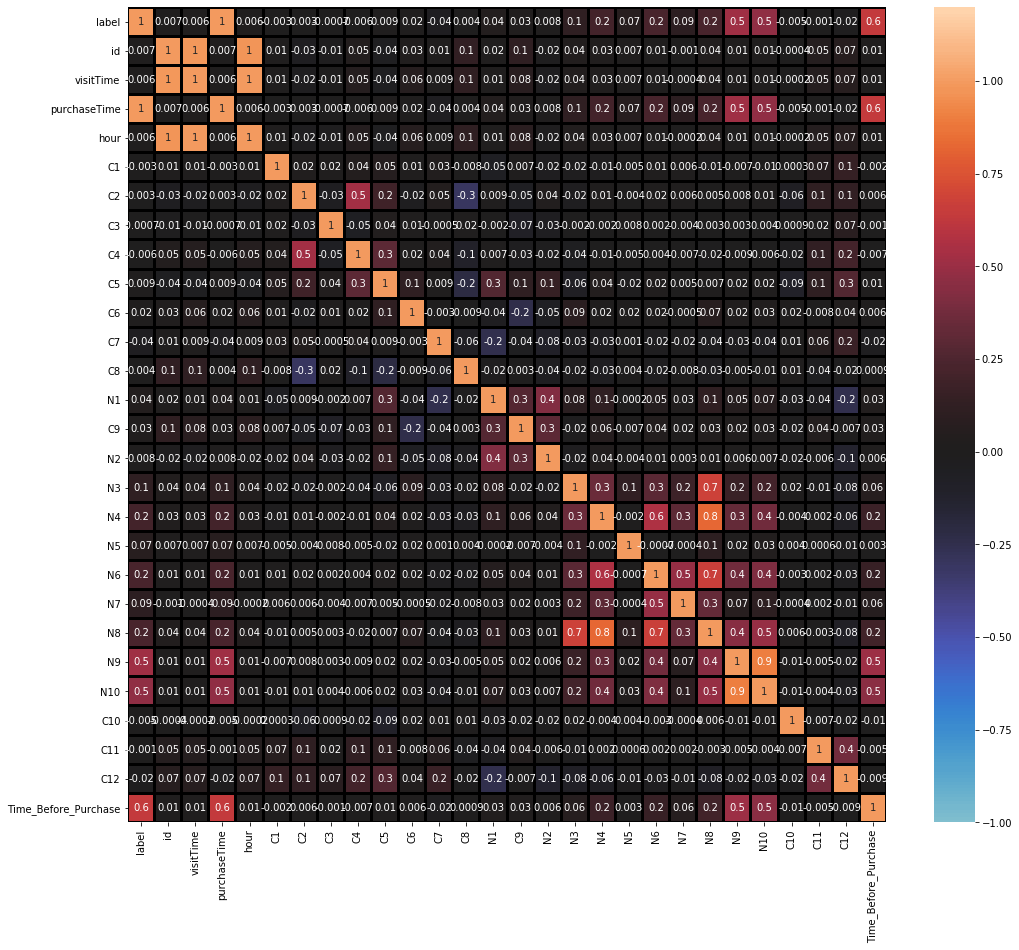

In [104]:
fig, ax = plt.subplots(figsize=(17,15))         # Sample figsize in inches
train.corr()
sns.heatmap(train.corr(),annot = True, fmt='.0g',vmin=-1, vmax=1.2, center= 0, linewidths=2, linecolor='black')


In [105]:
train = train.drop({'id','visitTime','purchaseTime',"C1","C3","C10",'C4',"N4","N8","N9"}, axis = 1) 

test = test.drop({'id','visitTime','purchaseTime',"C1","C3","C10",'C4',"N4","N8","N9"}, axis = 1) 

In [106]:
len(train.columns)

18

18


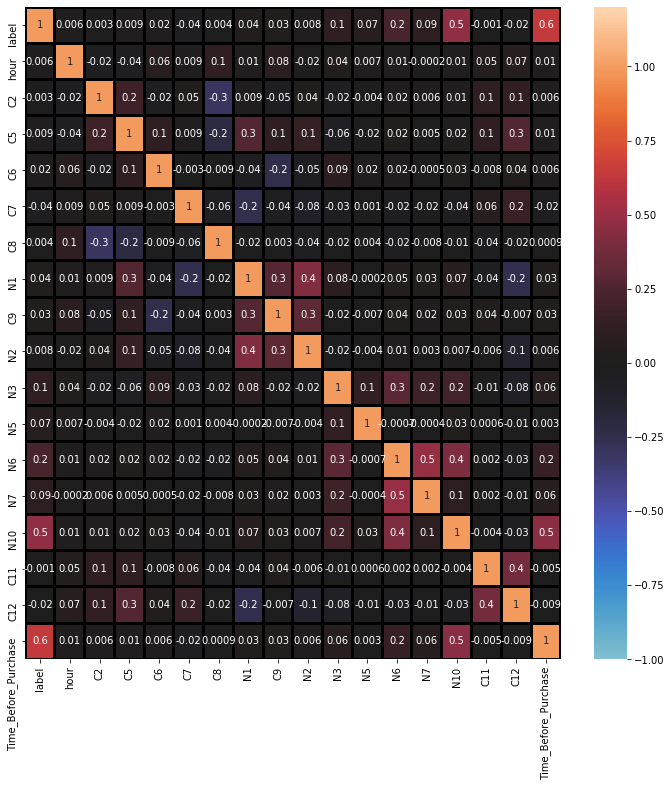

In [107]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
corr1 =train.corr()
sns.heatmap(corr1,annot = True, fmt='.0g',vmin=-1, vmax=1.2, center= 0, linewidths=2, linecolor='black')
print(len(train.columns))

In [108]:
#encoding the categorical variables
label_encoder = preprocessing.LabelEncoder()

train["C2"] = label_encoder.fit_transform(train.iloc[:,4]).astype('int')
train["C5"] = label_encoder.fit_transform(train.iloc[:,2]).astype('int')
train["C6"] = label_encoder.fit_transform(train.iloc[:,5]).astype('int')
train["C7"] = label_encoder.fit_transform(train.iloc[:,6]).astype('int')
train["C8"] = label_encoder.fit_transform(train.iloc[:,7]).astype('int')
train["C9"] = label_encoder.fit_transform(train["C9"]).astype('int')
train["C11"] = label_encoder.fit_transform(train["C11"]).astype('int')
train["C12"] = label_encoder.fit_transform(train["C12"]).astype('int')

In [124]:
#encoding the categorical variables
label_encoder = preprocessing.LabelEncoder()

test["C2"] = label_encoder.fit_transform(test.iloc[:,4]).astype('int')
test["C5"] = label_encoder.fit_transform(test.iloc[:,3]).astype('int')
test["C6"] = label_encoder.fit_transform(test.iloc[:,5]).astype('int')
test["C7"] = label_encoder.fit_transform(test.iloc[:,6]).astype('int')
test["C8"] = label_encoder.fit_transform(test.iloc[:,7]).astype('int')
test["C9"] = label_encoder.fit_transform(test["C9"]).astype('int')
test["C11"] = label_encoder.fit_transform(test["C11"]).astype('int')
test["C12"] = label_encoder.fit_transform(test["C12"]).astype('int')


In [110]:
#oversampling the minority class

sm = SMOTE()

sm_trainX, sm_trainY = sm.fit_resample(train.drop('label', axis=1), train['label'])

In [111]:
Newtrain = pd.concat([pd.DataFrame(sm_trainY), pd.DataFrame(sm_trainX)],axis=1,)
Newtrain.head(20)

Newtrain.columns = train.columns

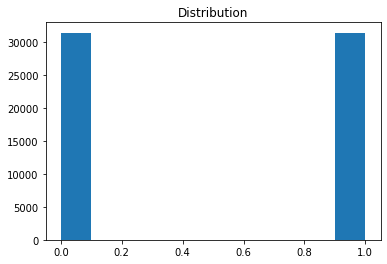

In [112]:
plt.hist(resampled_df['label'])
plt.title('Distribution')
plt.show()

In [113]:
#Labeling training & testing set:
y_train = Newtrain['label']
X_train = Newtrain.iloc[:,1:]
y_test = test['label']
X_test = test.iloc[:,1:]

In [123]:
#Model 1: logistic regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


#predicting the test set results

test1= test.iloc[:,1:20]
predictions = classifier.predict_proba(test1)[:,1]
y_pred = classifier.predict(test1)

sum(y_pred)
len(y_pred)

prediction_table = [test_id, predictions]
prediction_table= pd.DataFrame({"id_client" :test_id, "predicted_prob" :predictions})

prediction_table.to_csv('ML_assignment_Bastien.csv', index=False)


C:\Users\basti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##  Logistic Regression